# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

## Part 1 - Data Preprocessing

### Importing the Dataset

In [2]:
df=pd.read_csv('./Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
X=df.iloc[:, 3:-1].values
y=df.iloc[:,-1].values

In [7]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [8]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the 'Gender' column

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X[:,2]=le.fit_transform(X[:,2])

In [10]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the 'Geography' column

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [12]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Train | Test split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [16]:
ann=tf.keras.models.Sequential()

### Adding the input layer and first hidden layer

In [17]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [18]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

### Adding the output layer

In [19]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

## Part 3 - Training the ANN

### compiling the ANN

In [20]:
ann.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

### Training the ANN on the Training set 

In [21]:
ann.fit(X_train,y_train,batch_size=32,epochs=10)

Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.5972 - accuracy: 0.7916
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4701 - accuracy: 0.7983
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4411 - accuracy: 0.8021
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.8109
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4285 - accuracy: 0.8121
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4247 - accuracy: 0.8170
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4201 - accuracy: 0.8231
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.8270
Epoch 9/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8276
Epoch 10/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8296

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

In [22]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 162ms/step
[[False]]


### Performance

In [23]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [24]:
y_pred=ann.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1577
           1       0.72      0.29      0.41       423

    accuracy                           0.83      2000
   macro avg       0.78      0.63      0.66      2000
weighted avg       0.81      0.83      0.80      2000



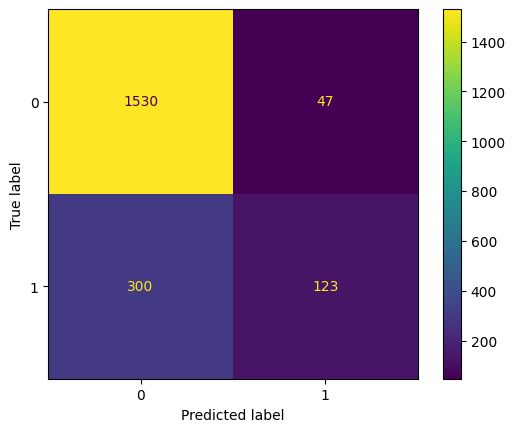

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()